In [1]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn  as skl
from numpy import asarray

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline      
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
from sklearn.svm           import SVC

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv(r'C:\Users\rnr31\Documents\GitHub\apple_watch_tracker\jupyter_notebooks\sort_dataset_5sec.csv')


In [3]:
def col_names_change(data):
    data.drop(['Unnamed: 0','id', 'activityrecognition#0'],axis=1, inplace=True)
    data_col = ['time','activityrecognition_1']
    for i in data.columns[2:58]:
        b = i.split('.')[2].split('#')
        data_col.append(f'{b[0]}_{b[1]}')

    for i in data.columns[58:66]:
        b = i.split('#')
        data_col.append(f'{b[0]}_{b[1]}')

    data_col.append('target')
    data_col.append('user')
    data = pd.DataFrame.from_records(data.values)
    data.columns = data_col

    return data

In [4]:
data = col_names_change(data)

In [13]:
data

,time,activityrecognition_1,accelerometer_mean,accelerometer_min,accelerometer_max,accelerometer_std,game_rotation_vector_mean,game_rotation_vector_min,game_rotation_vector_max,game_rotation_vector_std,...,sound_mean,sound_min,sound_max,sound_std,speed_mean,speed_min,speed_max,speed_std,target,user
0,190.0,92.0,10.179832,10.137434,10.207683,0.020380,0.995086,0.995067,0.995112,0.000017,...,84.350732,84.350732,84.350732,0.923820,NaN,NaN,NaN,NaN,Train,0.0
1,193.0,35.0,10.179362,9.853068,10.587065,0.167584,0.987558,0.987359,0.987745,0.000117,...,89.762268,89.762268,89.762268,0.001198,NaN,NaN,NaN,NaN,Train,0.0
2,256.0,8.0,9.657759,9.029124,10.286443,0.414025,0.844973,0.840452,0.851091,0.004017,...,89.769040,89.769040,89.769040,0.013131,30.75,30.75,30.75,NaN,Car,0.0
3,86.0,100.0,10.299321,8.088142,12.456252,1.604990,0.968824,0.956427,0.975352,0.008850,...,88.572737,88.572737,88.572737,0.095157,0.75,0.75,0.75,NaN,Walking,0.0
4,91.0,85.0,9.729062,7.139446,14.355289,2.184604,0.928255,0.925184,0.931989,0.002932,...,89.773691,89.767912,89.779470,0.008173,11.00,11.00,11.00,NaN,Bus,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,47.0,100.0,10.672879,6.701437,14.237094,2.590851,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,12.0
5889,94.0,85.0,10.926161,7.289184,16.733950,2.618939,NaN,NaN,NaN,NaN,...,83.545534,83.545534,83.545534,1.800958,NaN,NaN,NaN,NaN,Walking,12.0
5890,64.0,100.0,11.173896,6.759052,17.244942,2.834614,NaN,NaN,NaN,NaN,...,78.116997,78.116997,78.116997,1.800958,NaN,NaN,NaN,NaN,Walking,12.0
5891,56.0,100.0,8.883861,4.312250,14.790456,3.825252,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,12.0


In [10]:
data['game_rotation_vector_mean'].mean()

0.7592804100223899

In [16]:
df1 = data.groupby(['user'], as_index=False)['accelerometer_mean'].mean()

In [17]:
df1

,user,accelerometer_mean
0,0.0,10.019784
1,1.0,9.880349
2,2.0,9.829491
3,3.0,10.157250
4,4.0,9.791253
5,5.0,10.168127
6,6.0,9.995616
7,7.0,10.064068
8,8.0,10.596119
9,9.0,9.862683


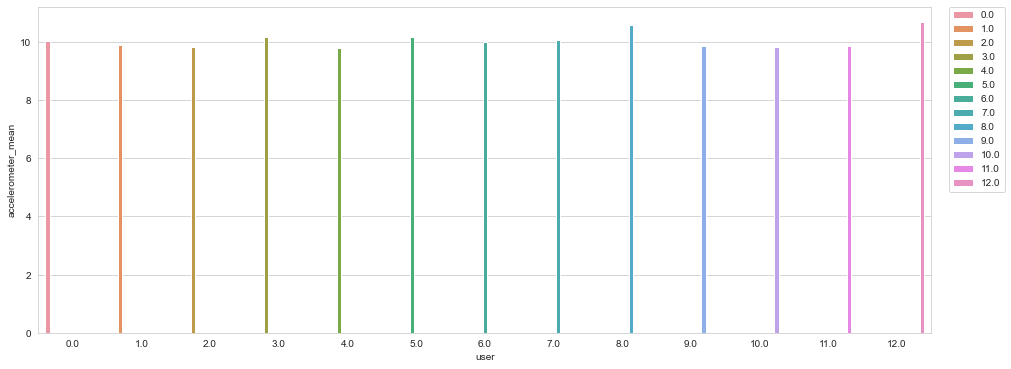

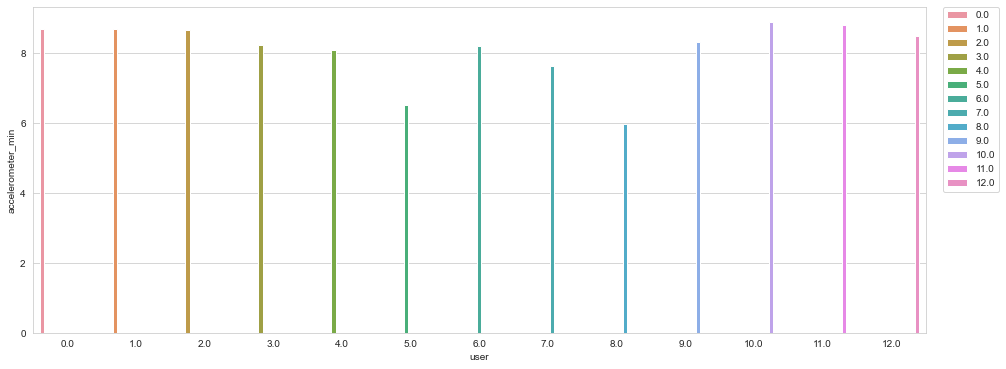

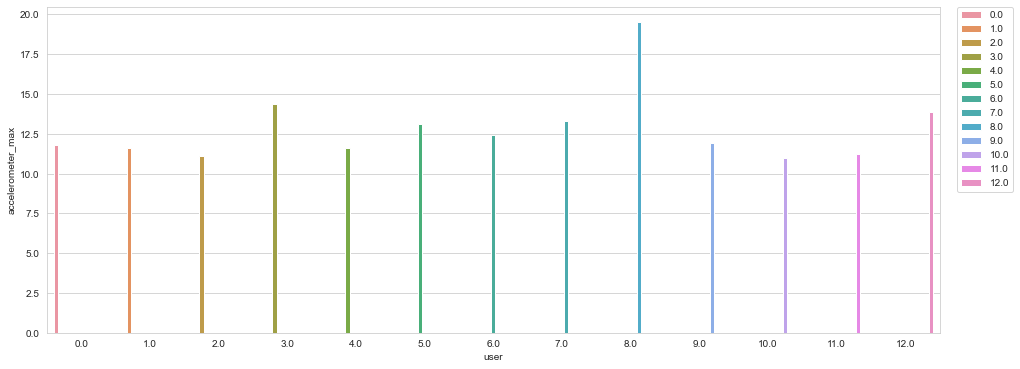

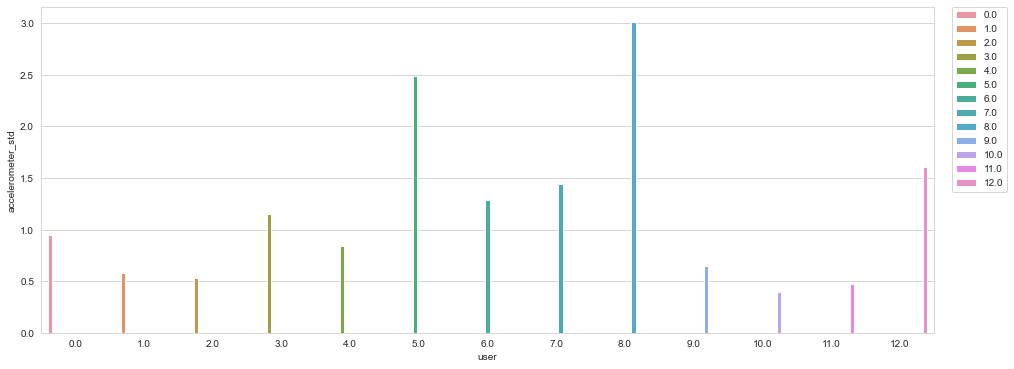

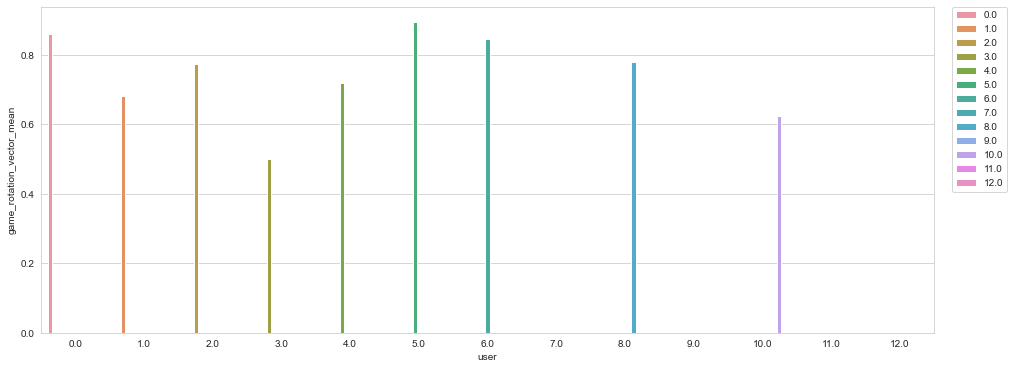

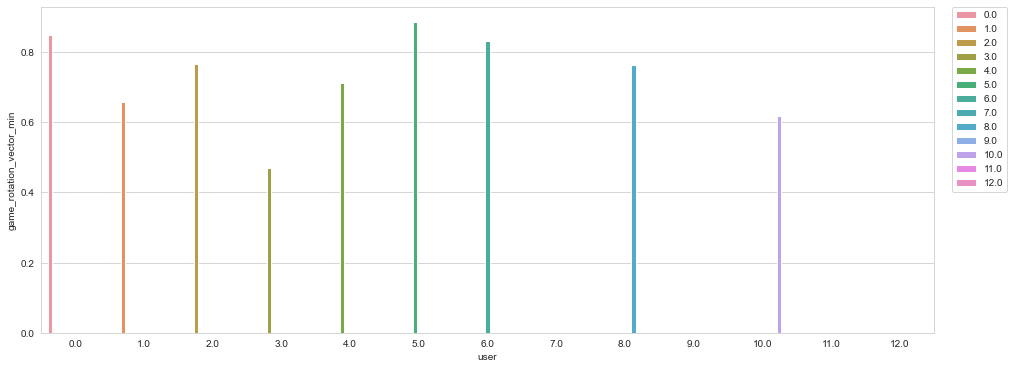

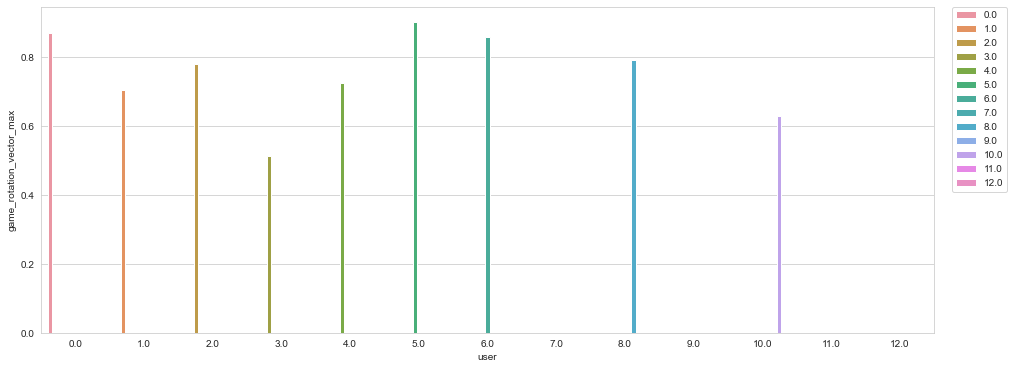

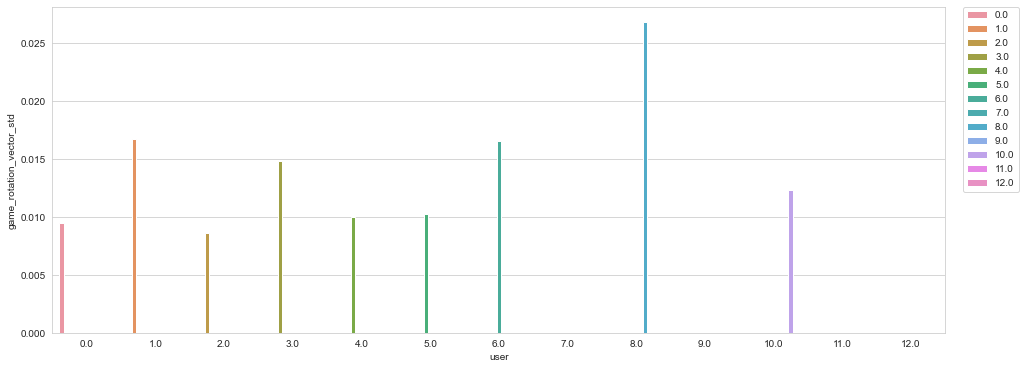

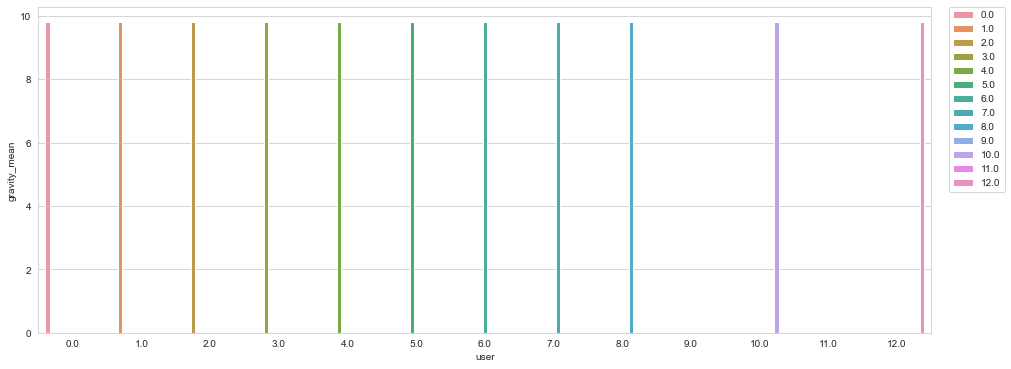

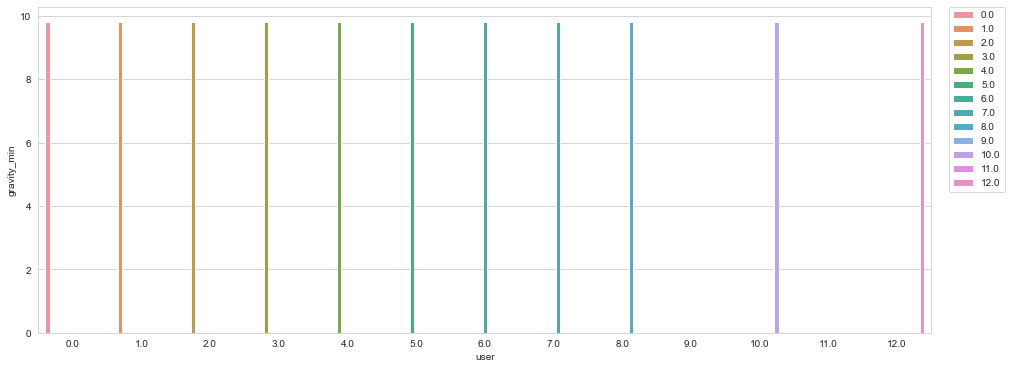

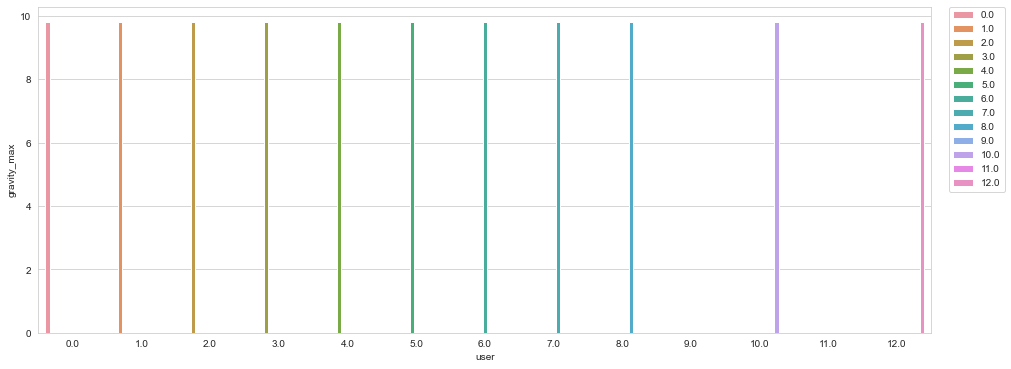

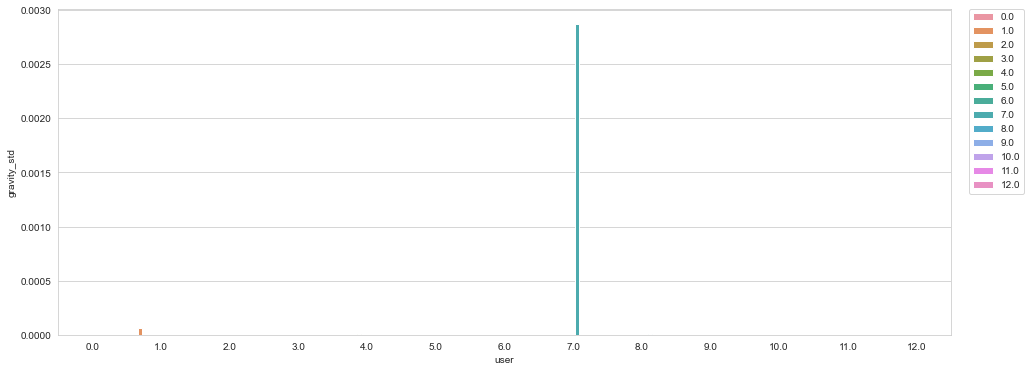

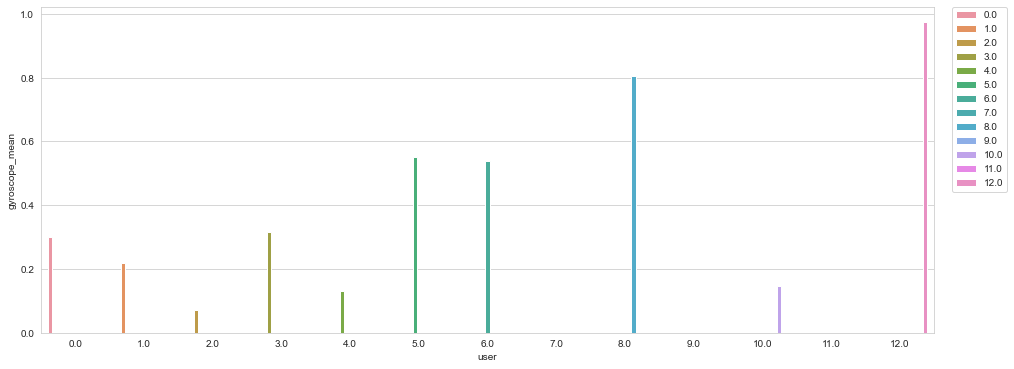

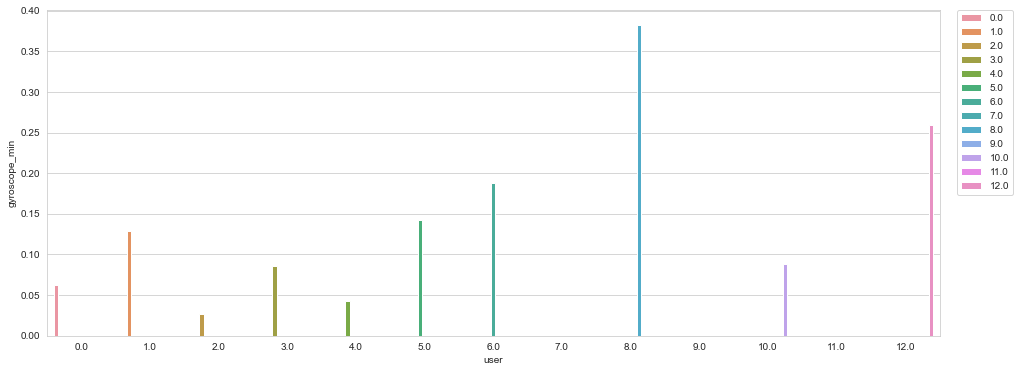

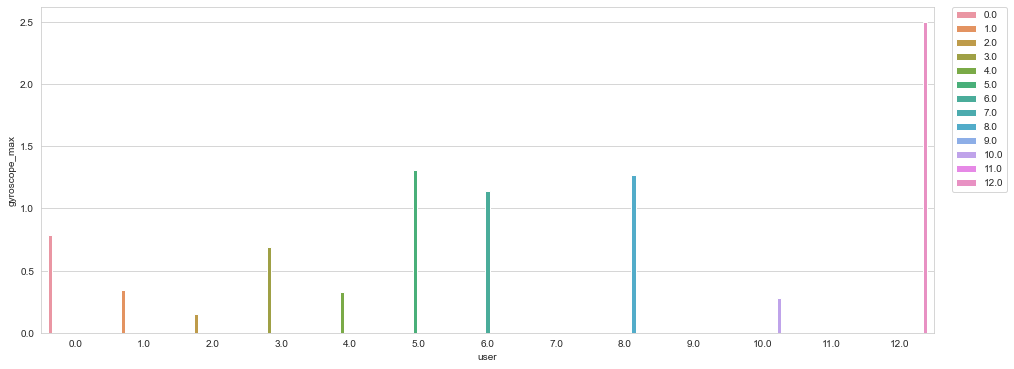

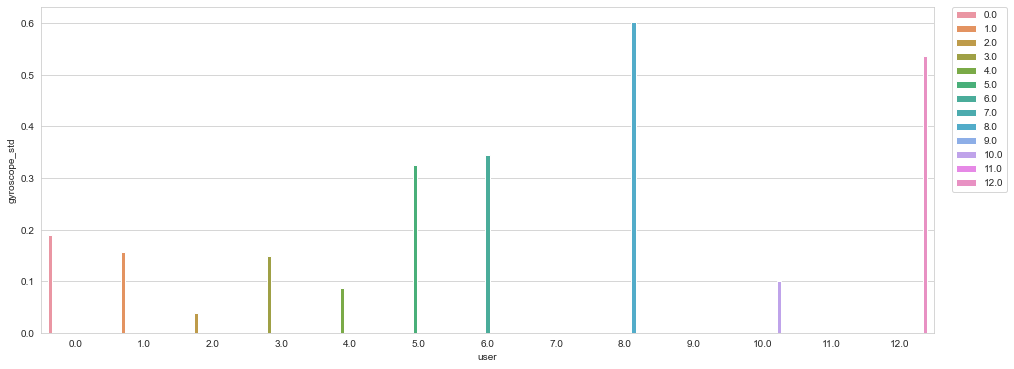

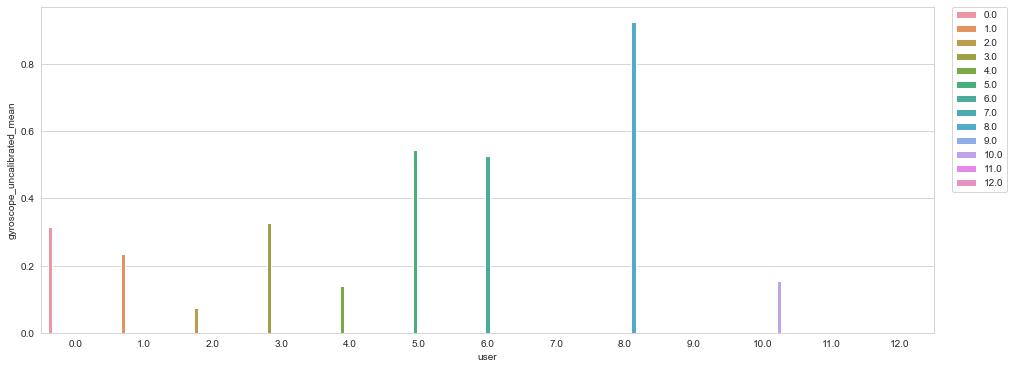

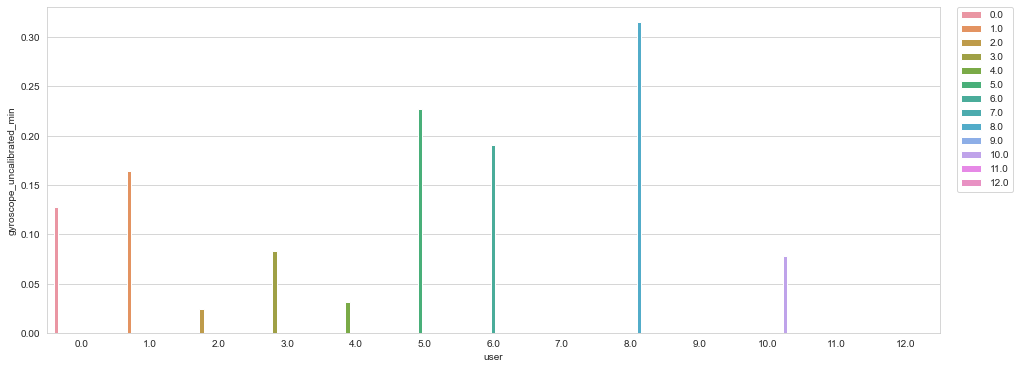

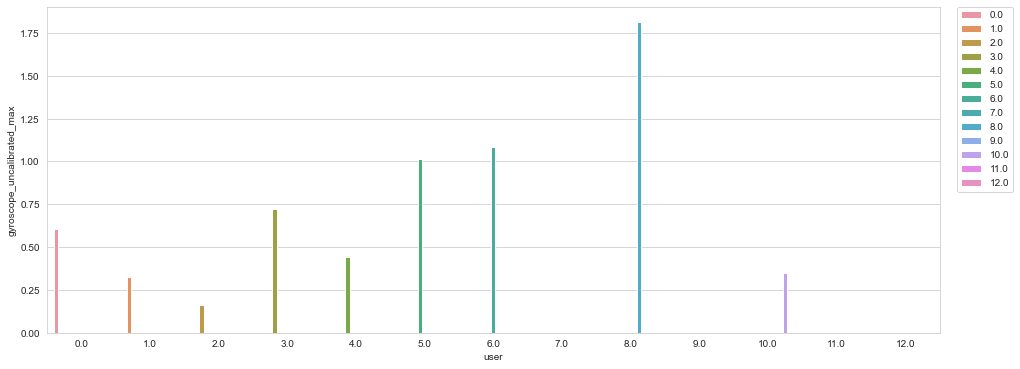

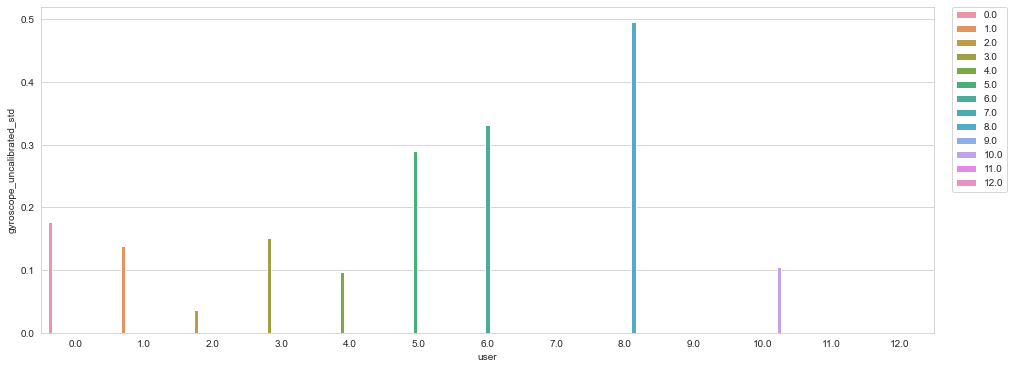

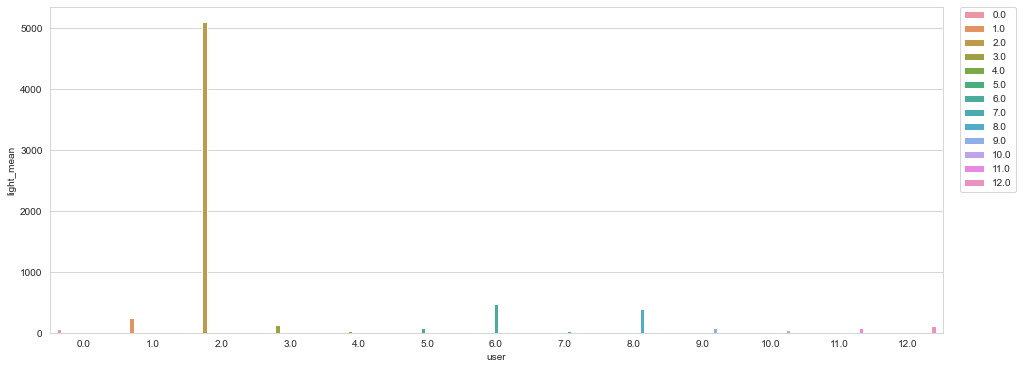

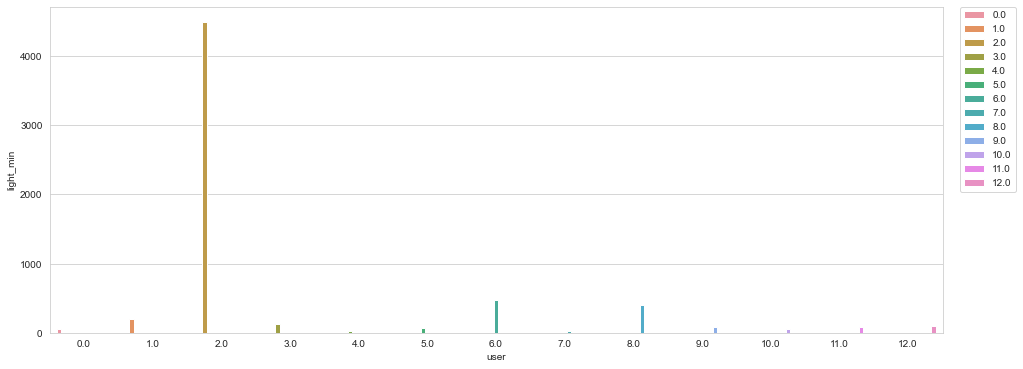

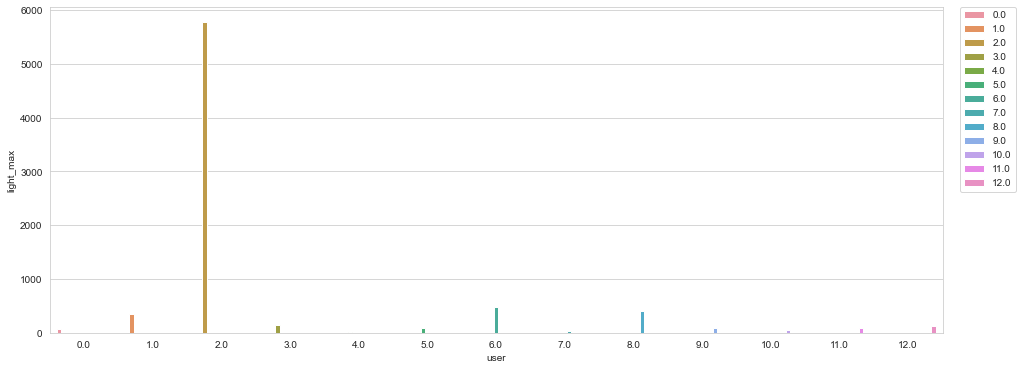

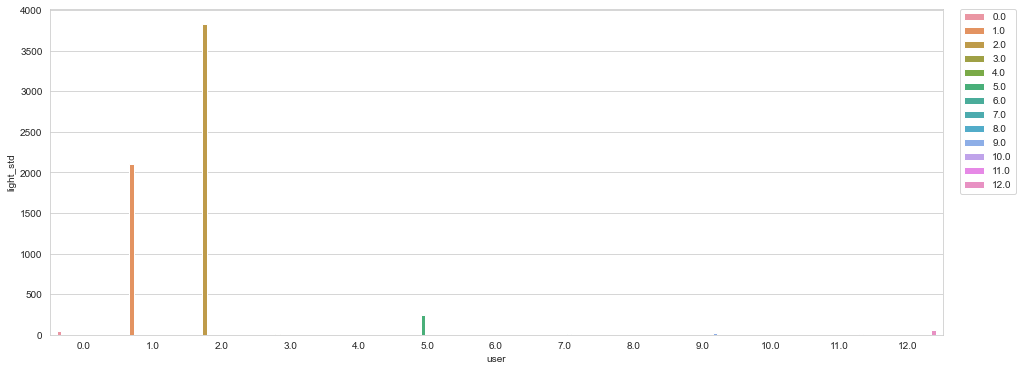

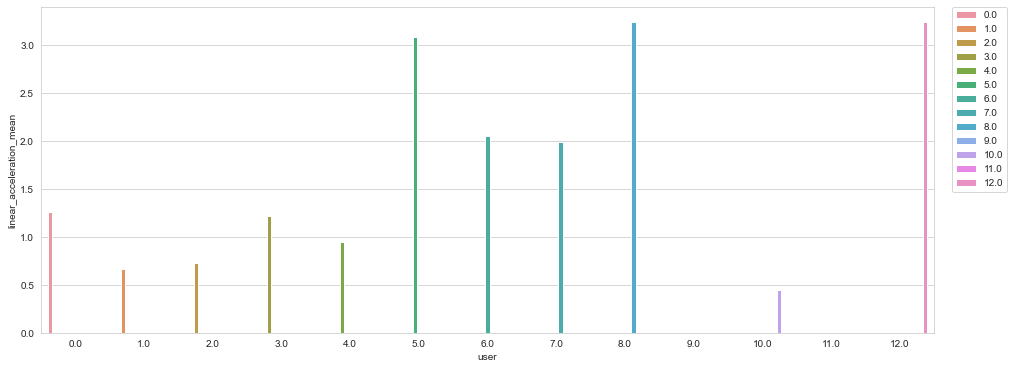

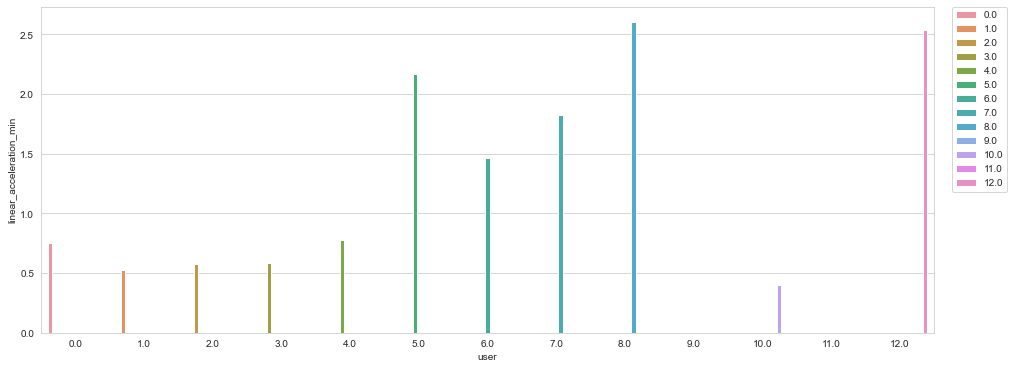

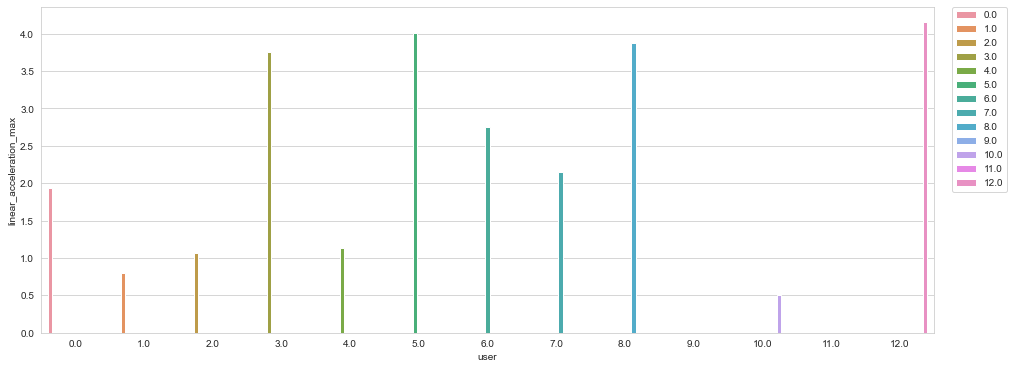

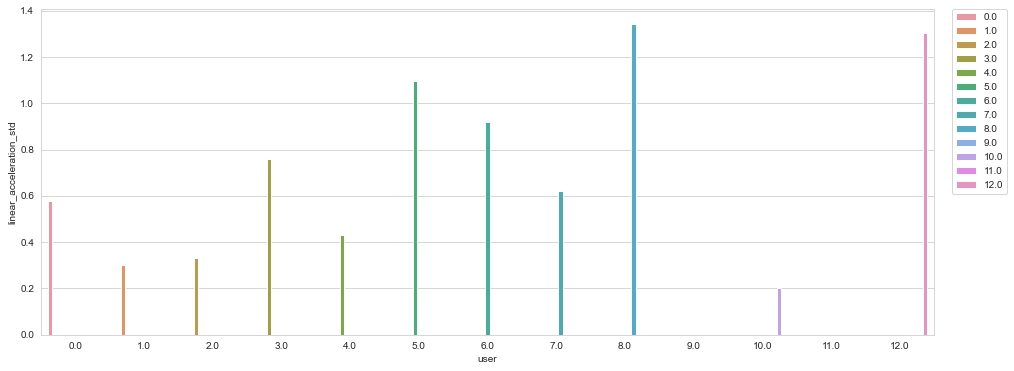

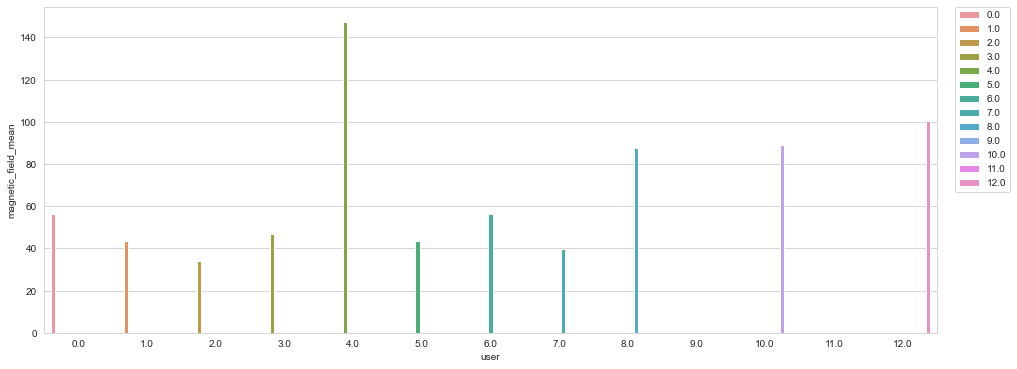

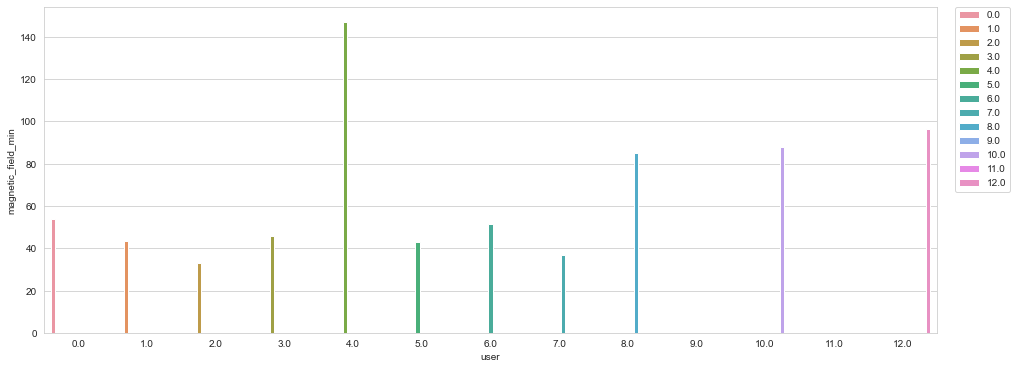

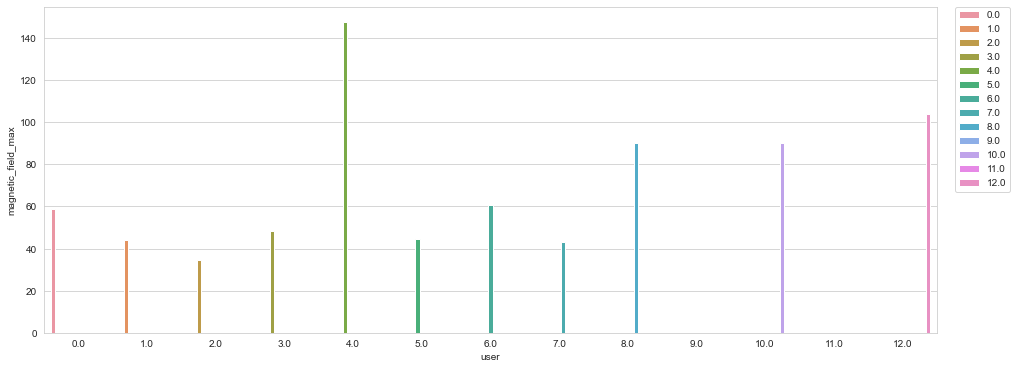

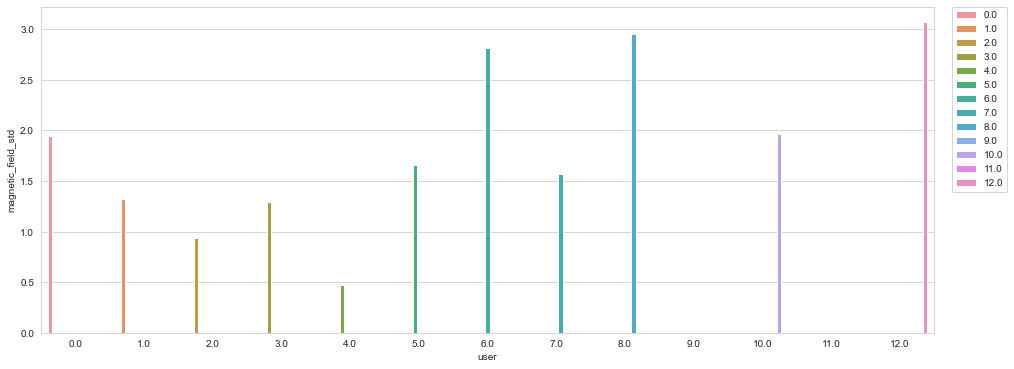

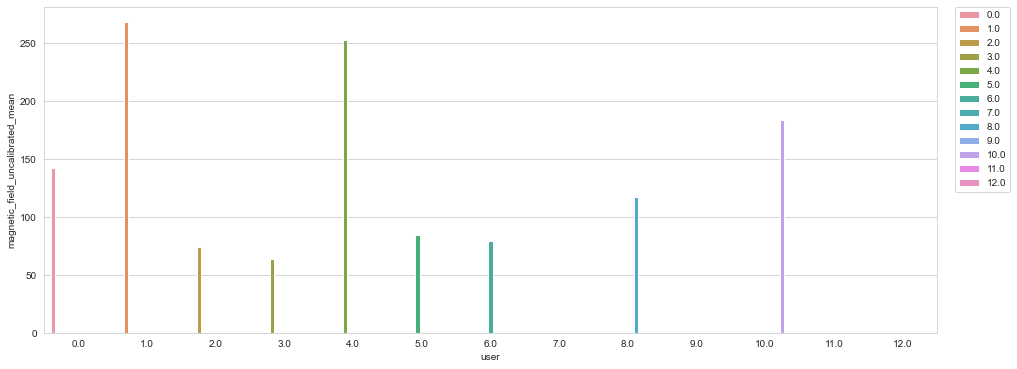

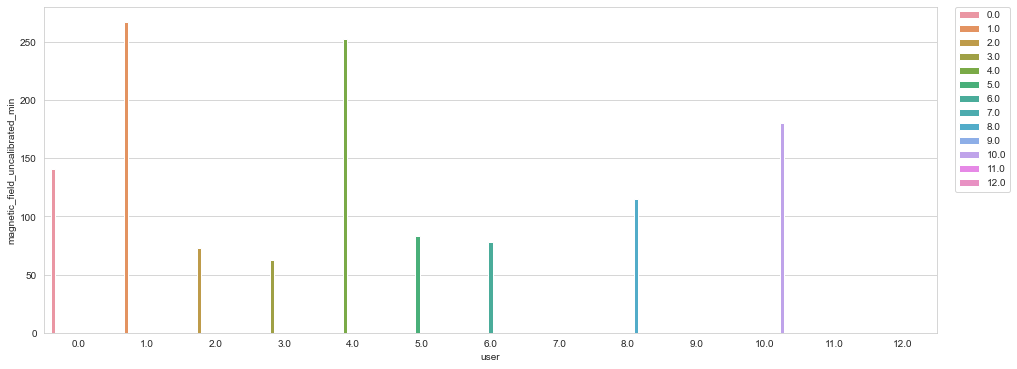

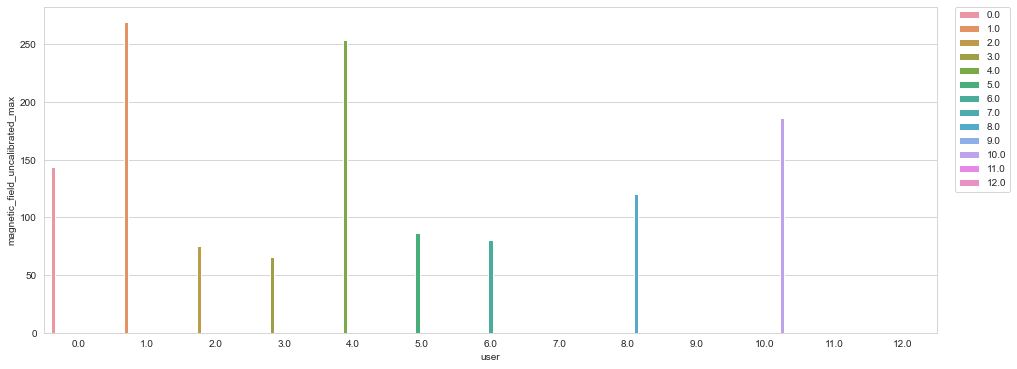

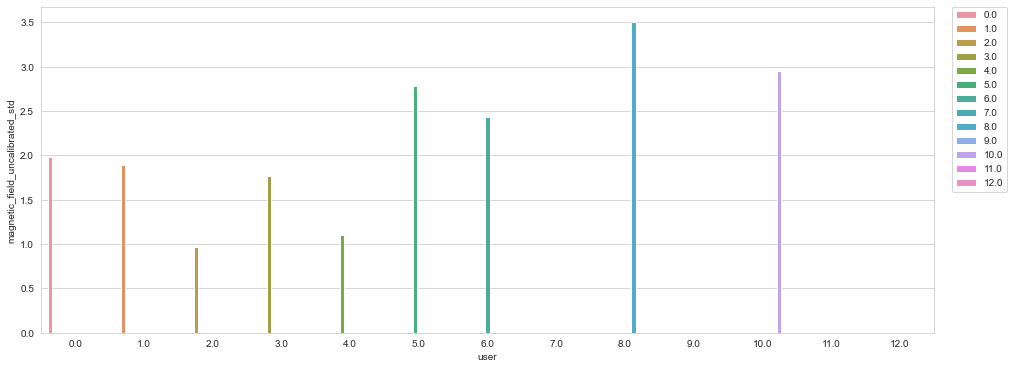

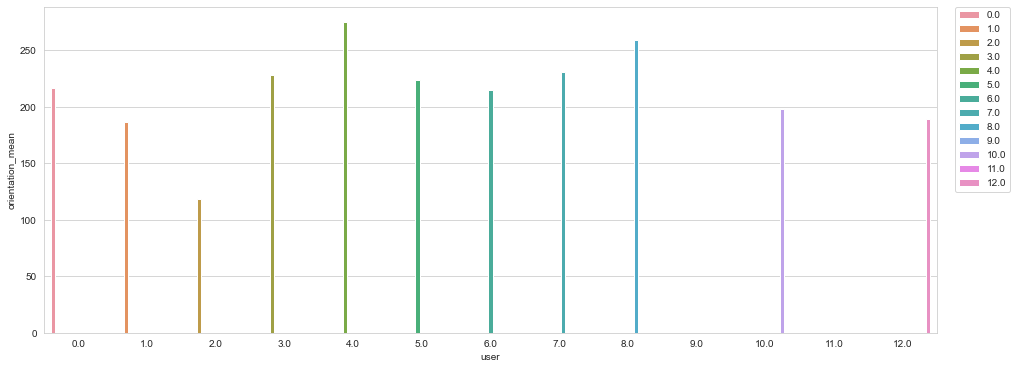

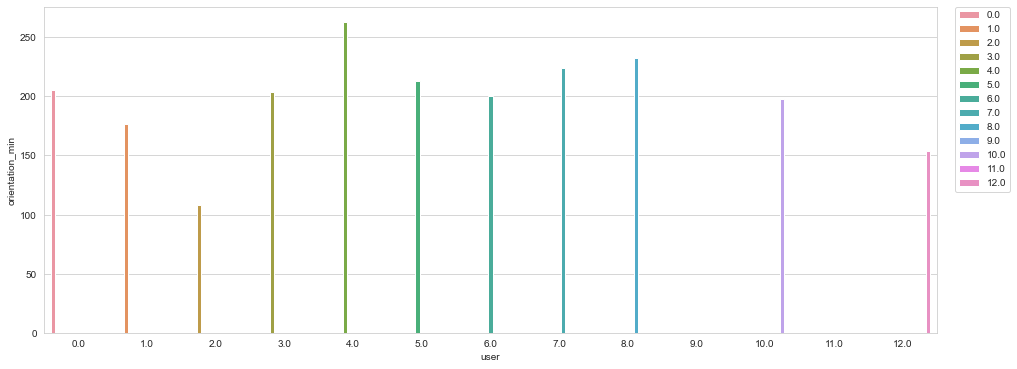

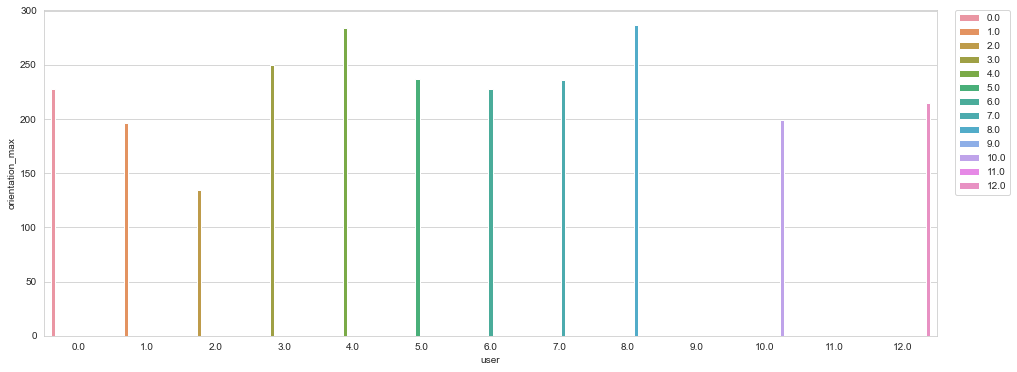

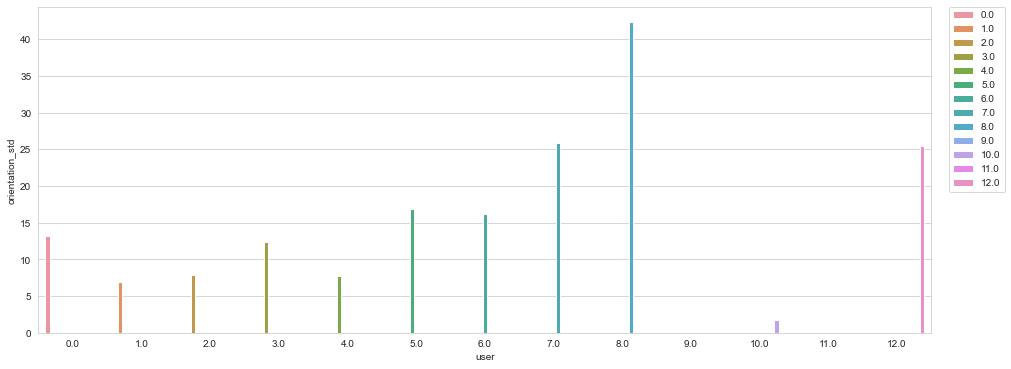

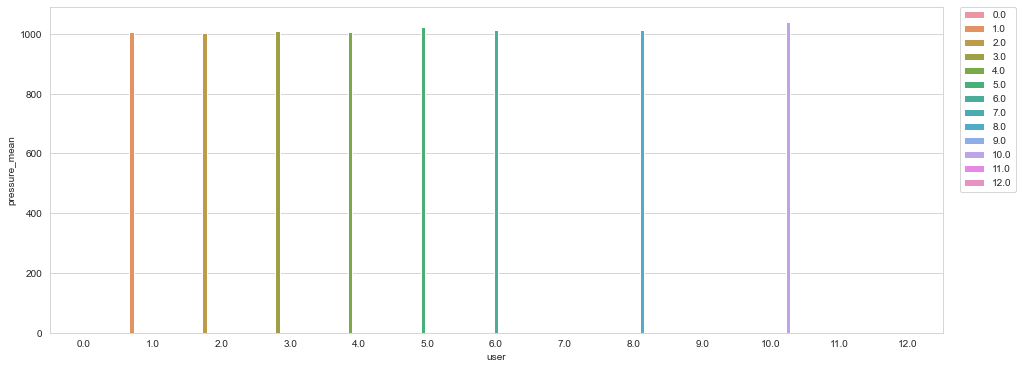

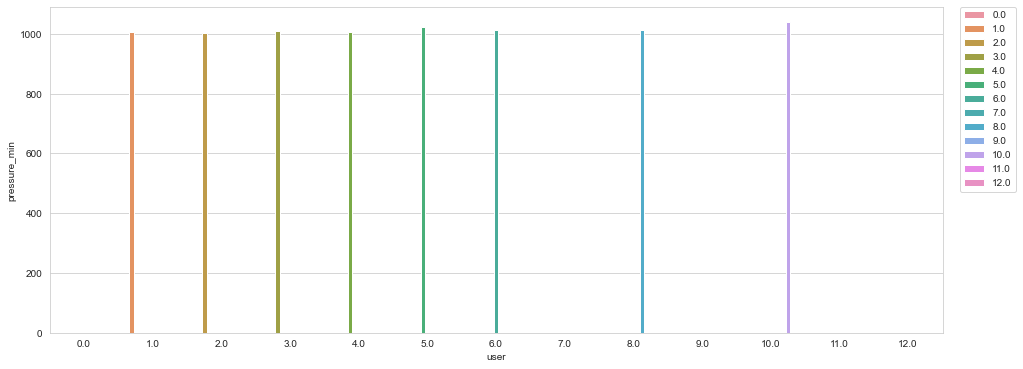

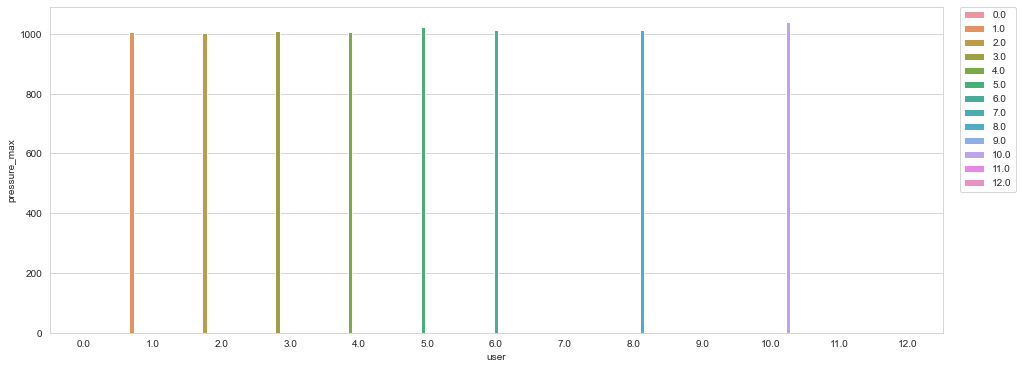

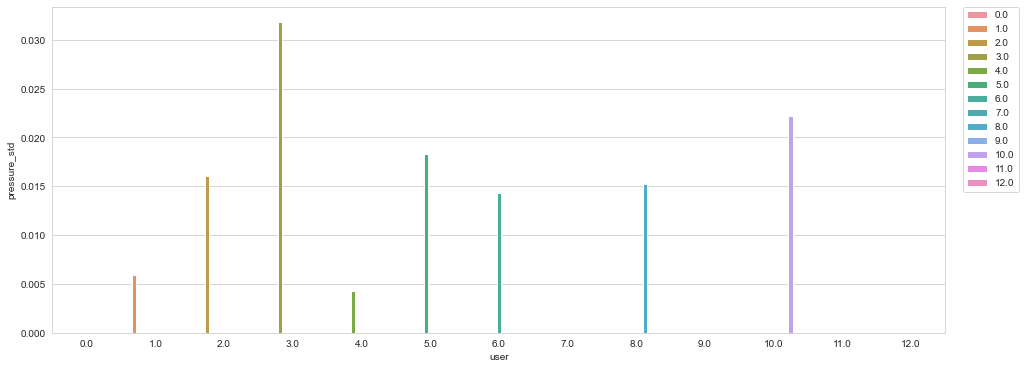

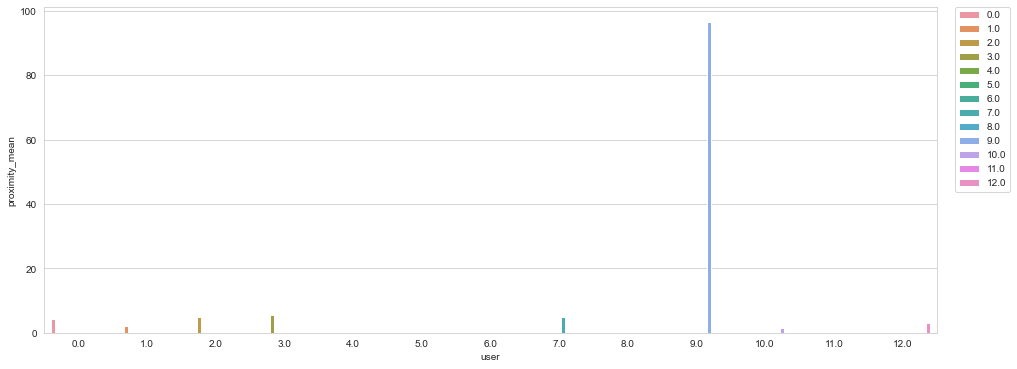

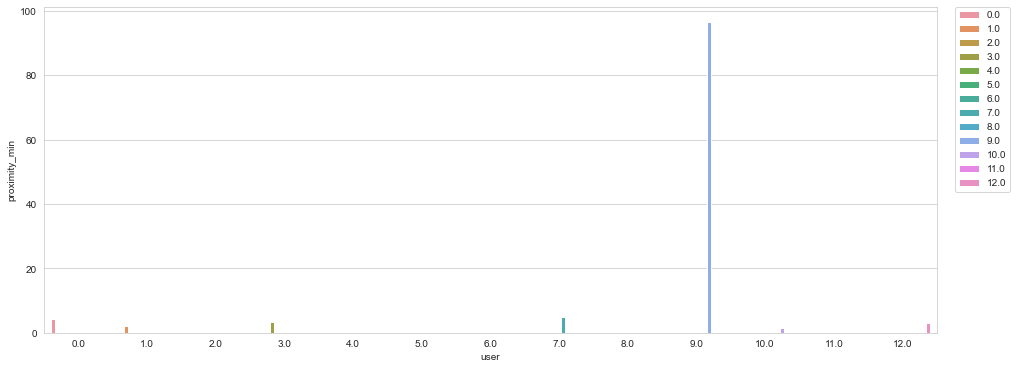

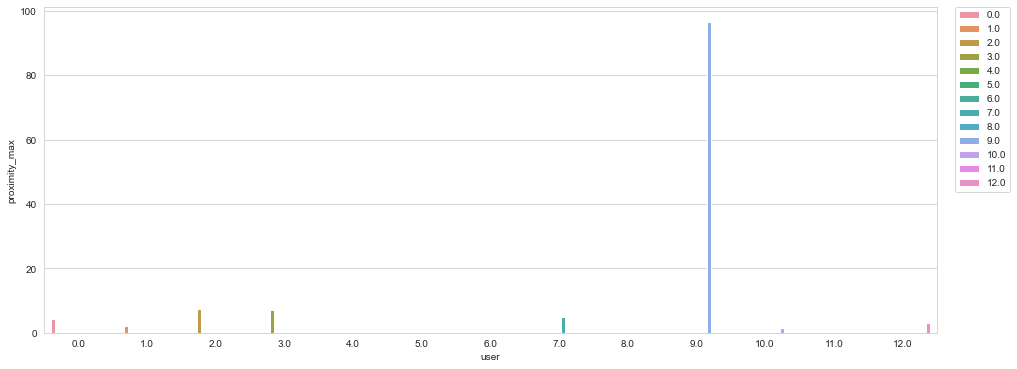

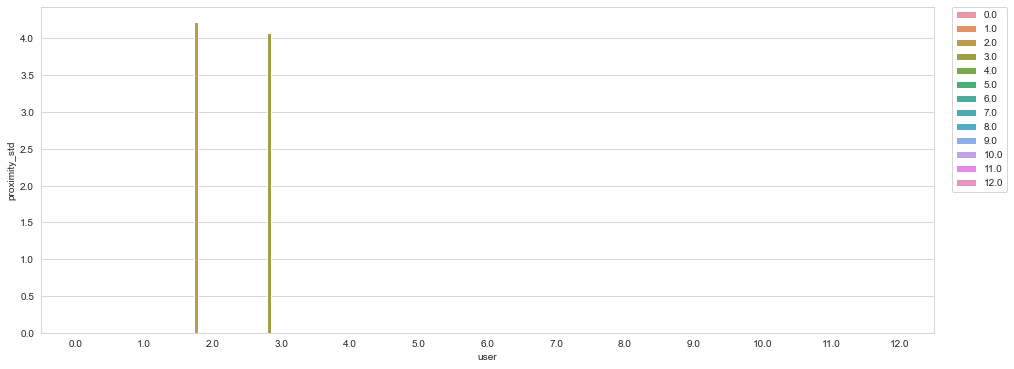

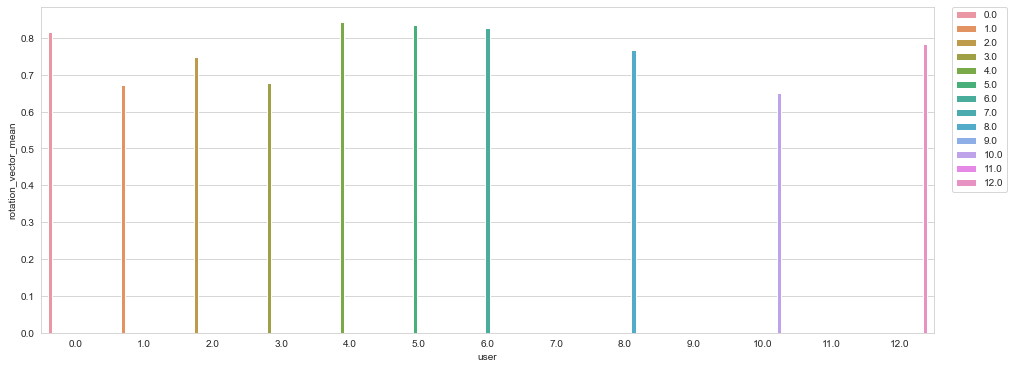

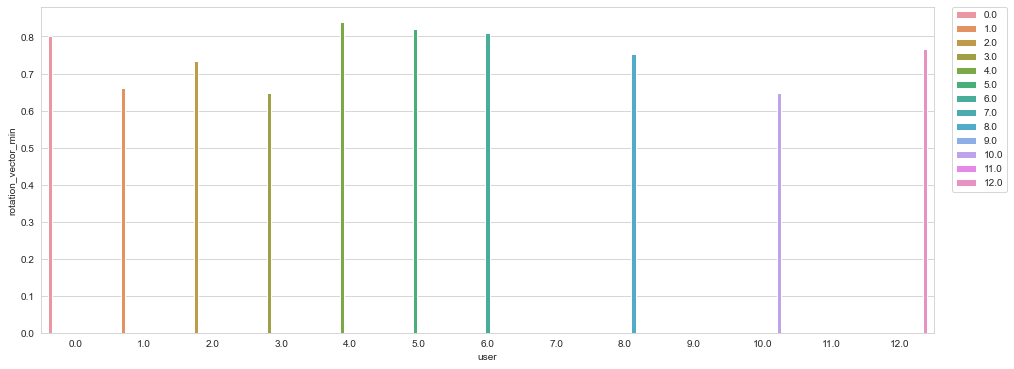

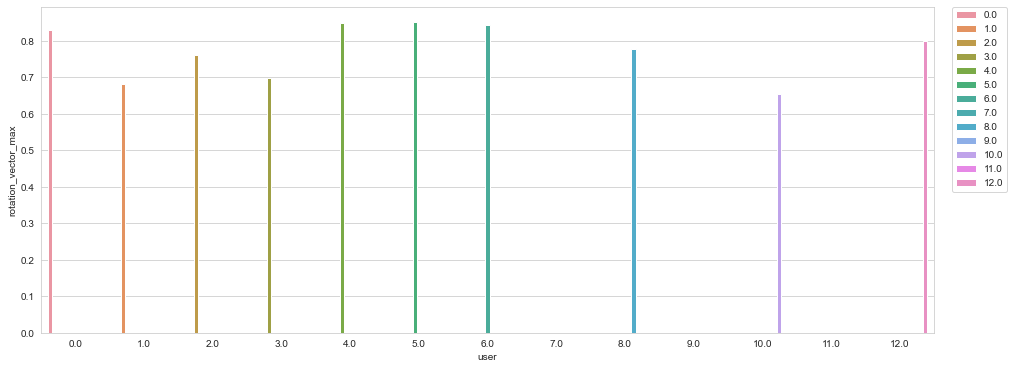

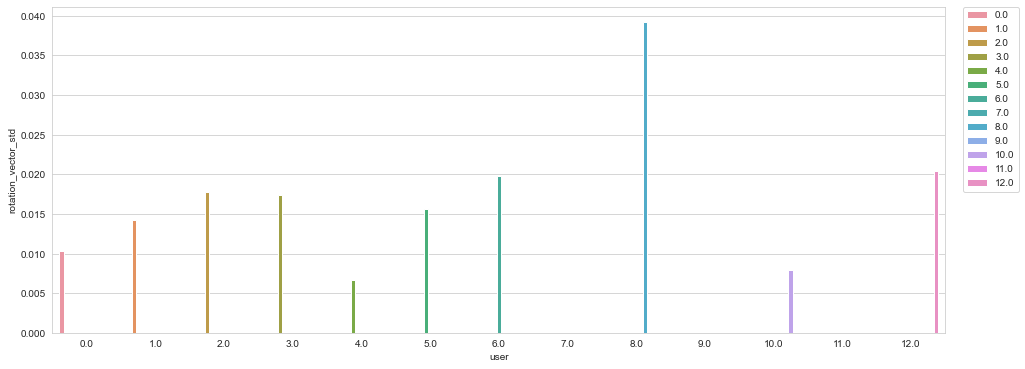

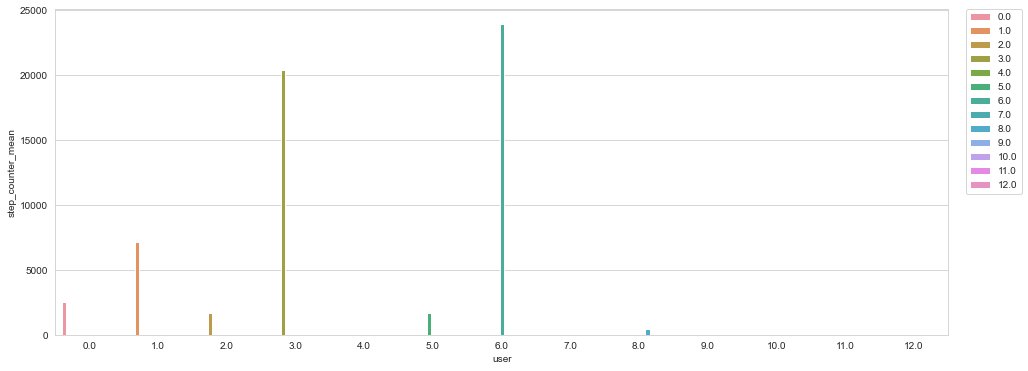

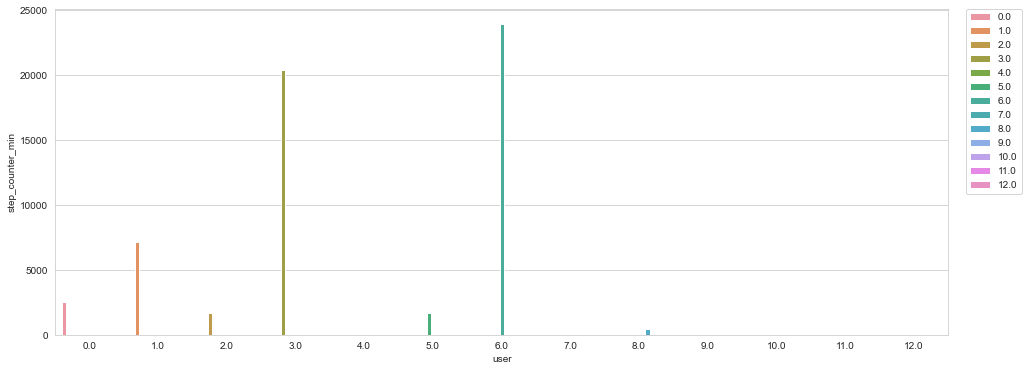

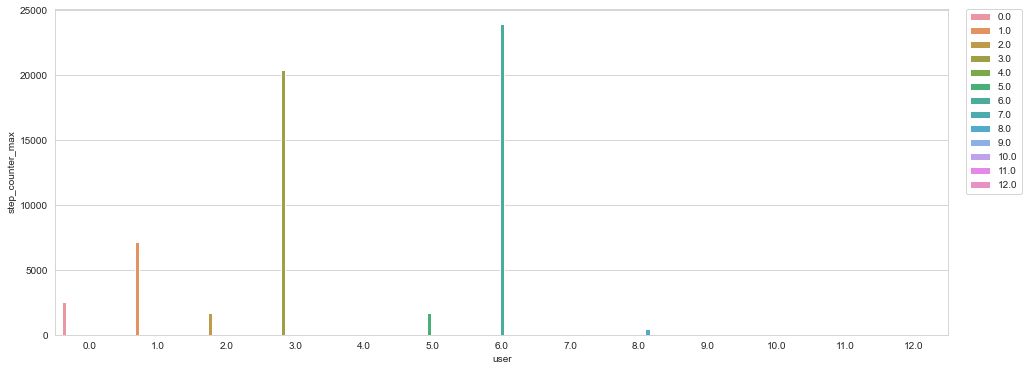

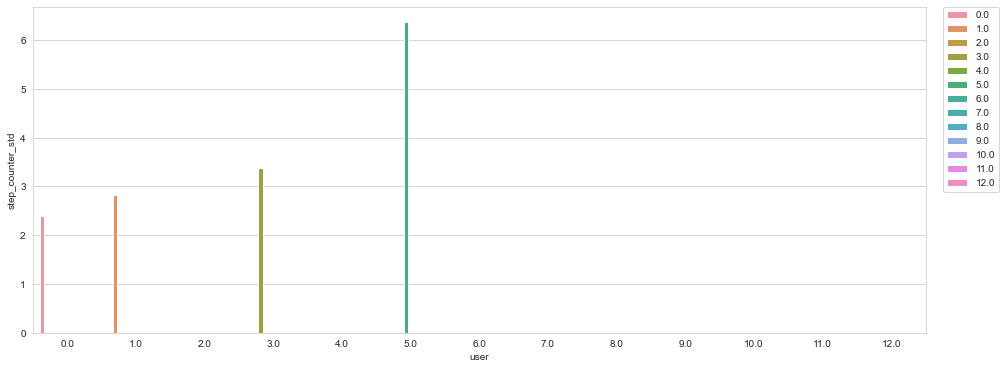

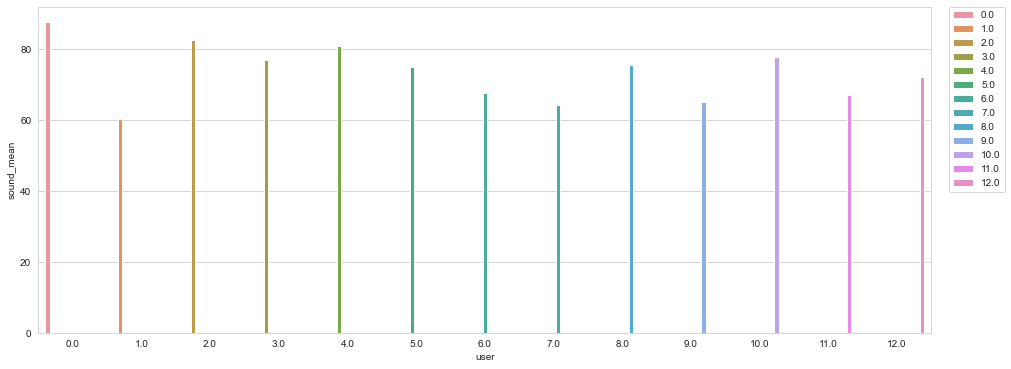

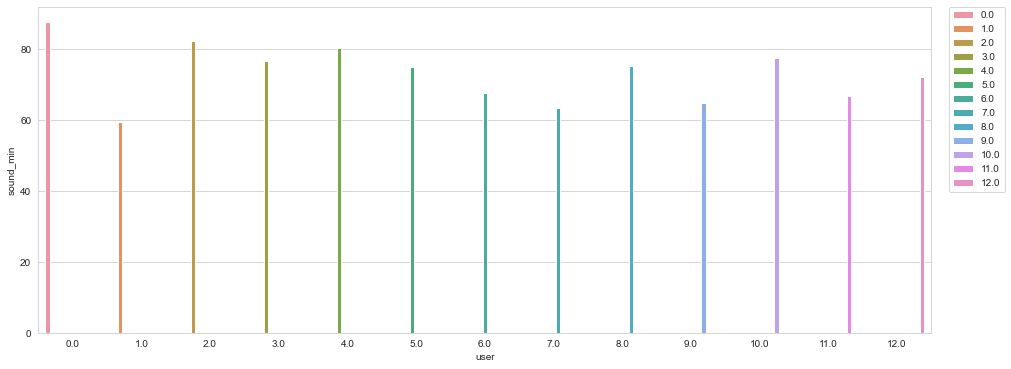

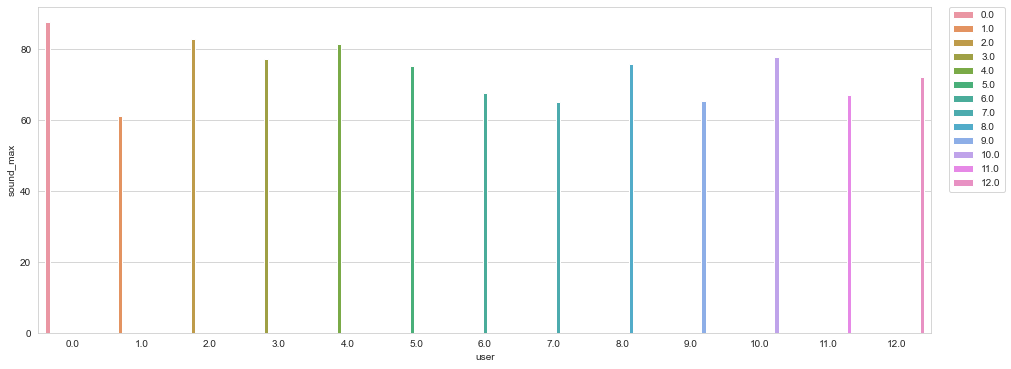

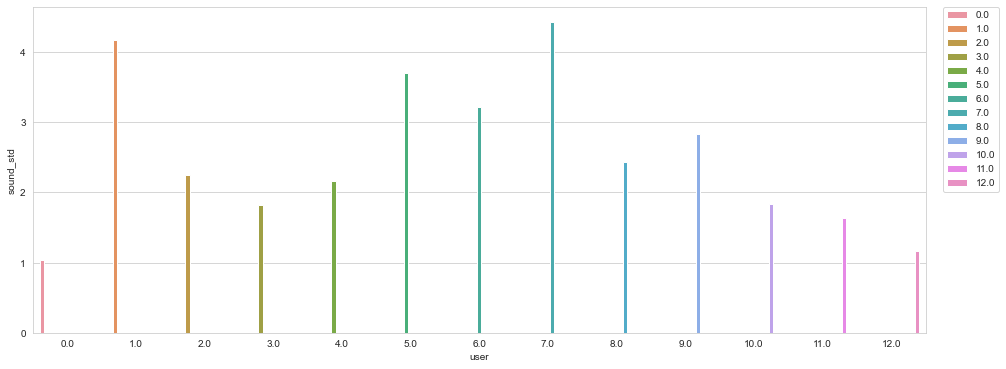

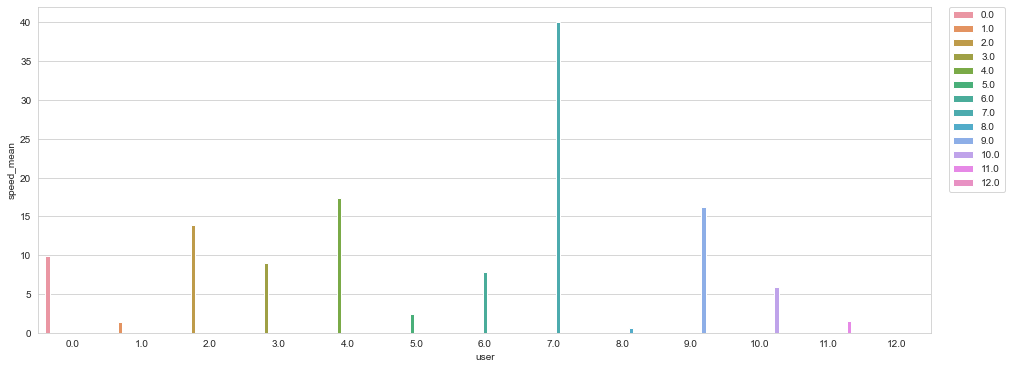

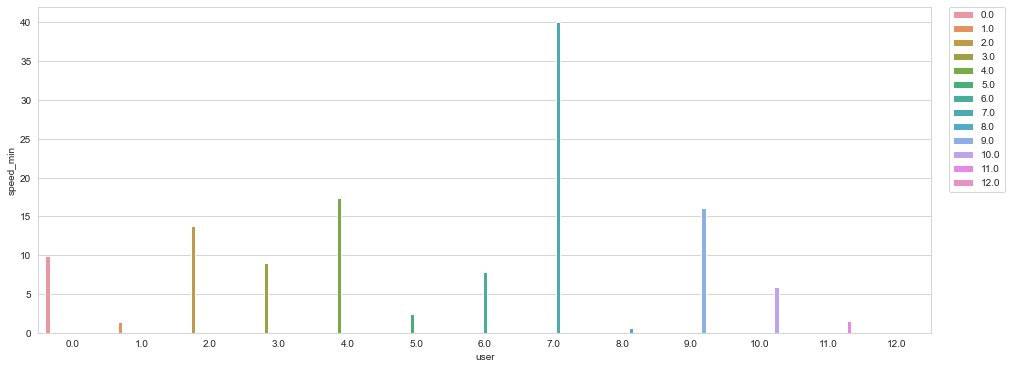

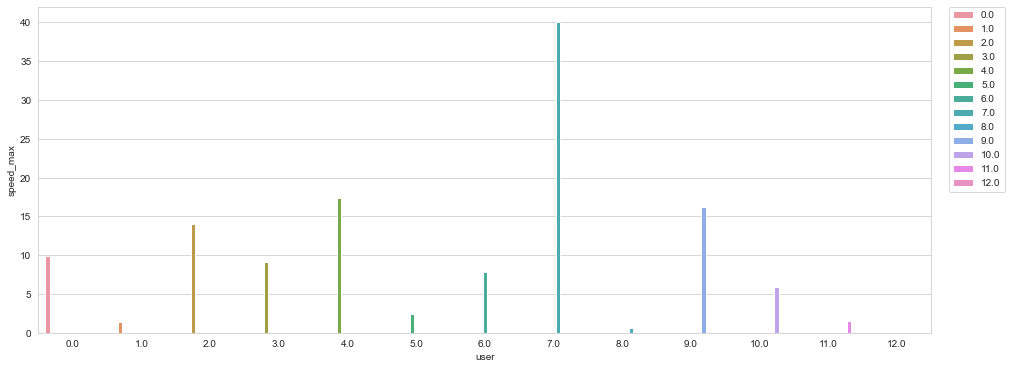

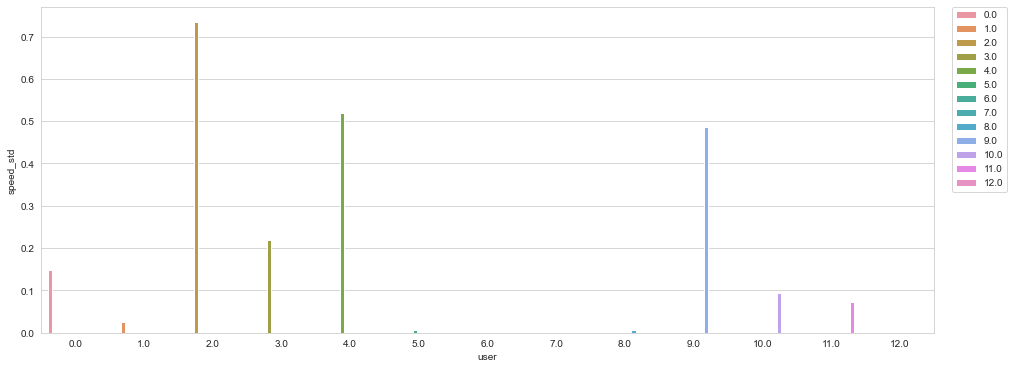

In [23]:
for i in data.columns[2:66]:
    df1 = data.groupby(['user'], as_index=False)[f'{i}'].mean()
    plt.figure(figsize=(16, 6))
    sns.barplot(x=df1['user'], y=df1[f'{i}'], hue='user', data= df1)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()
    


    